In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FOLDER = './Data/'

In [2]:
train = pd.read_csv(DATA_FOLDER+'train.csv')

In [188]:
def formatTeam(gameId):
    game = train[(train.matchId == gameId)]
    team = game.groupby(['matchId','groupId','winPlacePerc'])['boosts','assists','kills','heals','DBNOs','damageDealt','headshotKills','rideDistance','walkDistance','weaponsAcquired'].sum().reset_index()
    team = team.set_index('matchId')
    team = team.drop('groupId', axis=1)
    team['isWinner'] = team.winPlacePerc.map( lambda x: True if x == 1 else False)
    return team;

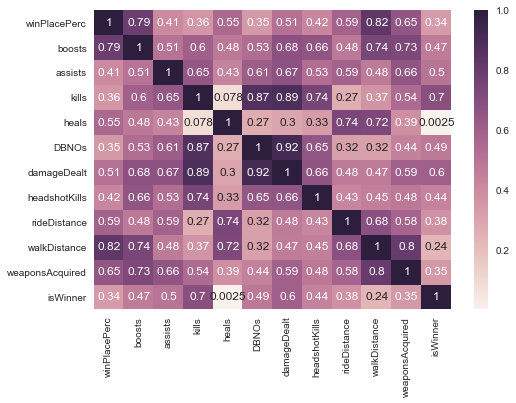

In [189]:
# plot the heatmap

team = formatTeam(1)
corr = team.corr()
ax = sns.heatmap(corr, annot=True)
plt.show()

In [221]:
gamesID = train.matchId.unique()

teams = formatTeam(0)
for ID in range(1,1000):
    currentTeam = formatTeam(ID)
    teams = teams.append(currentTeam)


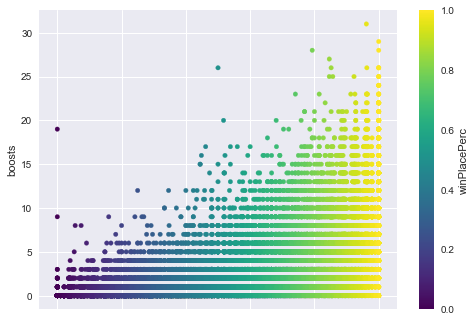

In [223]:
teams.plot.scatter(x='winPlacePerc',y='boosts',c='winPlacePerc',colormap='viridis')
plt.show()